# Doppler Looper
## - Source Code and Sandbox

A Toy Astrophysics Applet for Outreach, with Cool Graphics for a scientific script.

(c) Yourong Frank Wang (yourong.f.wang@auckland.ac.nz) for 2020 McGill Hackathon.

Project page: FWPhys.com/DopplerLooper

In [650]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from scipy.integrate import solve_ivp, odeint

## Defining Fundamental Constants

Two parts of the program talk to each other through a set of pre-defined physical quantities. The values are given in SI Units.

[WolframAlpha KnowledgeBase 2020]

In [651]:
## Orbital Mechanics

MSol    = 1.99e30 # kg
MEarth  = 5.97e24 # kg

AU      = 1.496e11 # m
Parsec  = 3.086e16 # m
G       = 6.674e-11 # m^3kg^-1s^-2

Year    = 365*86400 # s

## Spectroscopy

c0      = 2.998e8 # m/s
hPlanck = 6.626e-34 # J*s
kBo     = 1.381e-23 # J/K

## Orbital Plane Creation

### For now, only 2-Body. System Com is held at Origin

In [652]:
# Centre of Mass is the Origin. Specify your own planet mass and parent star mass.

PlanetMass = 1e5 # User Input, in Earth Mass Units

StarMass = 1 # User Input, in Solar Mass Units

Perihelion = 0.6 # User Input, in A.U.

e = 0.4 # Eccentricity. 0 -> Circle. 1 -> Parabola. 

In [653]:
# Converting to SI Units.

mP = PlanetMass*MEarth
mS = StarMass*MSol
xC = Perihelion*AU

print("DL: Creating 2-Body Orbital Plane.")

## Simulation always starts from Perihelion, in Centre-of-mass Frame

xP = xC / (1+mP/mS)
xS = xC - xP

aP = xP/(1-e)
aS = xS/(1-e)

## Initial Velocity is purely tangential.

# Circular Orbit

yDotSc = np.sqrt(G*mP*xS/xC**2)
yDotPc = np.sqrt(G*mS*xP/xC**2)

# Actual Orbit
yDotS = yDotSc * np.sqrt(1+e)
yDotP = yDotPc * np.sqrt(1+e)

print(yDotS,yDotP)

DL: Creating 2-Body Orbital Plane.
11975.449227650346 39918.16409216782


In [654]:
# 2Body Simulation restricted to x-y Plane
#
def FWNBodyM(y,t):
    
    # Structure of State Vector: x1,x1Dot,y1,y1Dot,...
    
    xSDot = y[1]
    ySDot = y[3]
    xPDot = y[5]
    yPDot = y[7]
    
    rS = np.array([y[0],y[2]])
    rP = np.array([y[4],y[6]])
    
    r = rP-rS # position vector of planet from star
    rNorm = np.linalg.norm(r)

    
    acc = G/rNorm**3*r # F = GMm/|r|^3*r
    
    xSDDot = mP*acc[0]
    ySDDot = mP*acc[1]
    xPDDot = -1*mS*acc[0]
    yPDDot = -1*mS*acc[1]
        
    return np.array([xSDot,xSDDot,ySDot,ySDDot,xPDot,xPDDot,yPDot,yPDDot])

In [655]:
# Analytical Orbits

cP = e*aP

bP = np.sqrt(aP**2-cP**2)

Th = np.linspace(0,2*np.pi,200)

xPPlot = aP*np.cos(Th) - cP
yPPlot = bP*np.sin(Th)

cS = e*aS

bS = np.sqrt(aS**2-cS**2)


xSPlot = aS*np.cos(Th) + cS
ySPlot = bS*np.sin(Th)

a = xC/(1-e)

T = 2*np.pi*np.sqrt((a)**3/(G*(mS+mP)))

In [657]:

tIntegrate = np.linspace(0,T,5000)
yIntegrate = odeint(FWNBodyM,[-xS,0,0,-yDotS,xP,0,0,yDotP],tIntegrate)

print('DL: Integration Complete.')

DL: Integration Complete.


## Plotting in MPL3D

In [660]:
Inclination = 0 # Degrees
Azimuth = 49 # Degrees

Text(0, 0, 'Observer Details\nAzimuzal Angle: $49.00^{\\circ}$\nInclination: $0.00^{\\circ}$')

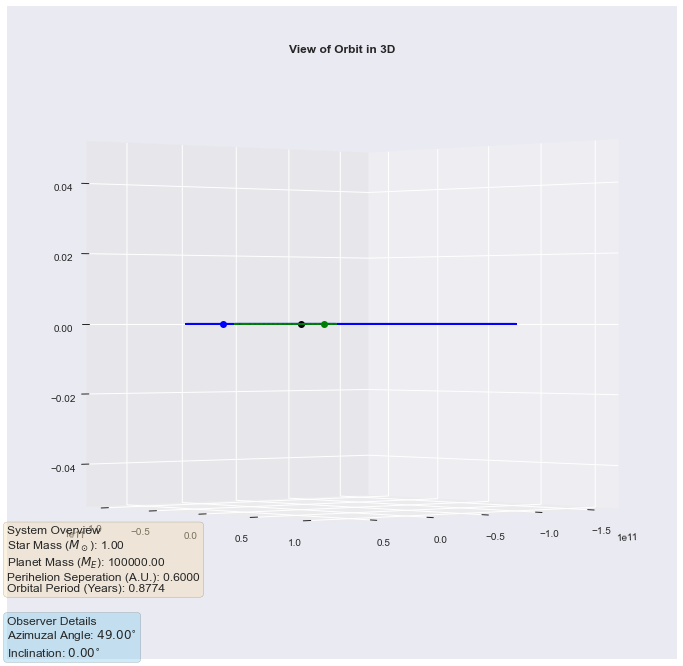

In [661]:
fig = plt.figure(figsize=(12, 12))

ax = fig.gca(projection='3d')
ax.view_init(Inclination, Azimuth)


ax.plot(yIntegrate[:,0],yIntegrate[:,2],'g-')

ax.plot(yIntegrate[:,4],yIntegrate[:,6],'b-')

ax.plot([-xS],[0],'go')
ax.plot([xP],[0],'bo')

ax.plot([0],[0],'ko')

ax.plot(xPPlot,yPPlot,'b--')
ax.plot(xSPlot,ySPlot,'g--')

ax.grid(True)
ax.set_title('View of Orbit in 3D',fontweight='bold')


textstr1 = '\n'.join((
    'System Overview',
    r'Star Mass ($M_\odot$): %.2f' % (StarMass, ),
    r'Planet Mass ($M_E$): %.2f' % (PlanetMass, ),
    r'Perihelion Seperation (A.U.): %.4f' % (Perihelion,),
    r'Orbital Period (Years): %.4f' %(T/Year,)
))

textstr2 = '\n'.join((
    'Observer Details',
    r'Azimuzal Angle: $%.2f^{\circ}$' % (Azimuth, ),
    r'Inclination: $%.2f^{\circ}$' % (Inclination, ),
))

# these are matplotlib.patch.Patch properties
props1 = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
props2 = dict(boxstyle='round', facecolor='skyblue', alpha=0.4)

ax.text2D(0, 0.1, textstr1, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=props1)


ax.text2D(0, 0, textstr2, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=props2)


# Velocity Projection

[0.65605903 0.75470958]


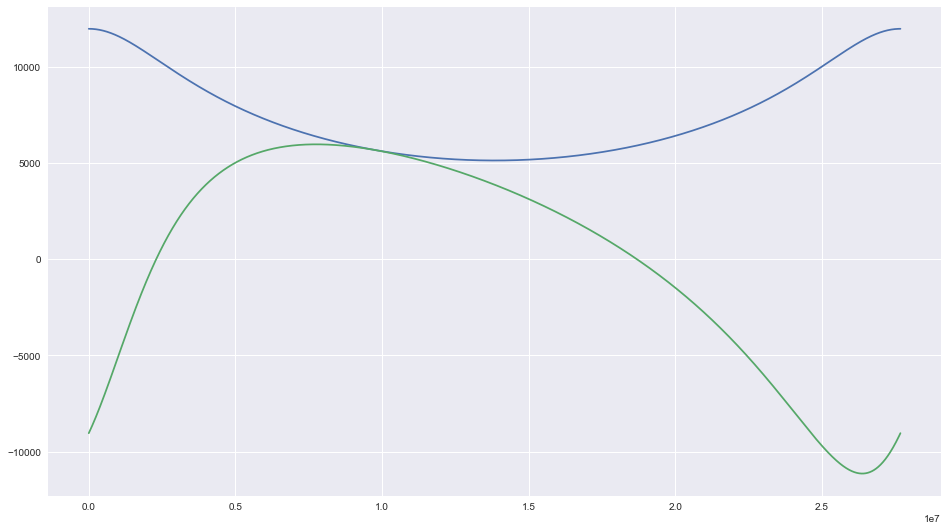

In [662]:
vSx = yIntegrate[:,1]
vSy = yIntegrate[:,3]

fig2 = plt.figure(figsize = (16,9))

ax2 = fig2.add_subplot(111)

ax2.plot(tIntegrate,np.sqrt(vSx**2+vSy**2),label = 'Total Speed')

Observer = np.array([np.cos(Inclination*np.pi/180)*np.cos(Azimuth*np.pi/180),
                     np.cos(Inclination*np.pi/180)*np.sin(Azimuth*np.pi/180)])

v = np.array([vSx,vSy])

print(Observer)

vObserved = vSx*Observer[0] + vSy*Observer[1]



ax2.plot(tIntegrate,vObserved,label = 'Observed Speed')


In [663]:
v = vObserved
shift_factor = np.sqrt((c0-v)/(c0+v))


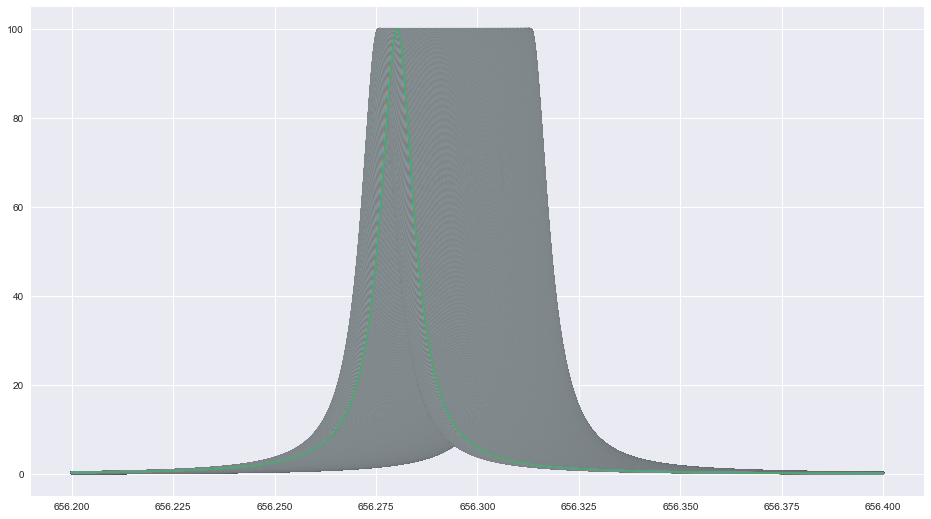

In [664]:
fig3 = plt.figure(figsize = (16,9))

ax3 = fig3.add_subplot(111)

Lam = 656.3e-9 # m

Wid = 1e-2 # Empirical

f = hPlanck*c0/Lam

ShiftedF = f*shift_factor

ShiftedL = hPlanck*c0/(ShiftedF)*1e9

LamPlot = np.linspace(656.2,656.4,600)

# ax3.set_ylim(0,2)

for ii in range(len(ShiftedL)):
    
    Amp = Wid/4/((LamPlot-ShiftedL[ii])**2+Wid**2/4)
    
    ax3.plot(LamPlot,Amp)
    
    
    
    